https://www.youtube.com/watch?v=SEQbb8w7VTw

Algorithmic Trading Strategy Using Python

Dual Moving Average Crossover

Short term average crosses over long term average

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

/Users/jimmydoran/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


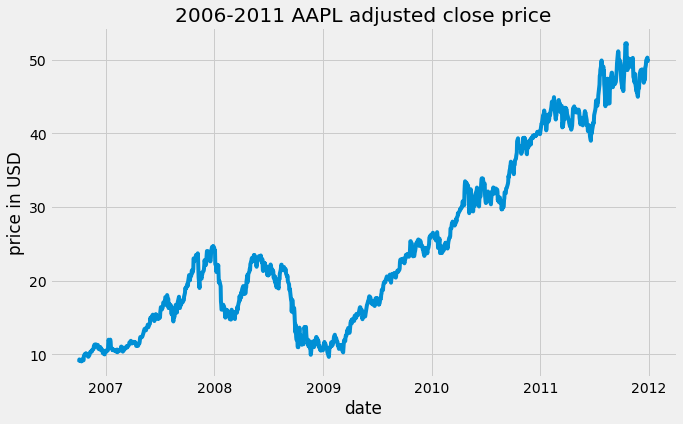

In [2]:
#load data
stock = pd.DataFrame()
stock['AAPL'] = wb.DataReader('AAPL',data_source = 'yahoo', start = '2006-10-02',end = '2011-12-30')['Adj Close']
plt.figure(figsize = (10,6))
plt.title('2006-2011 AAPL adjusted close price')
plt.ylabel("price in USD")
plt.xlabel('date')
plt.plot(stock['AAPL'])

plt.show()

In [3]:
#create 30 day MA (SMA)
sma = pd.DataFrame()
sma['30']=stock['AAPL'].rolling(window=30).mean()
sma['100']=stock['AAPL'].rolling(window=100).mean()
sma

,30,100
Date,,
2006-10-02,NaN,NaN
2006-10-03,NaN,NaN
2006-10-04,NaN,NaN
2006-10-05,NaN,NaN
2006-10-06,NaN,NaN
...,...,...
2011-12-23,47.529592,47.965659
2011-12-27,47.619913,48.001722
2011-12-28,47.716294,48.037611


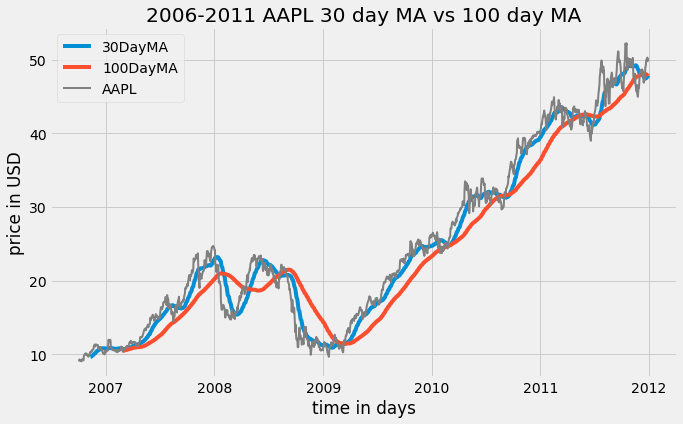

In [4]:
#visualize the moving average data
plt.figure(figsize = (10,6))
plt.title('2006-2011 AAPL 30 day MA vs 100 day MA')
plt.ylabel("price in USD")
plt.xlabel('time in days')
plt.plot(sma['30'], label = '30DayMA')
plt.plot(sma['100'], label = '100DayMA')
plt.plot(stock['AAPL'], color = 'grey',label = 'AAPL',linewidth=2.0)
plt.legend(loc='upper left')

plt.savefig('aaple30vs100.png')
plt.show()

In [5]:
#one df
aapl = pd.DataFrame()
aapl['AAPL']=stock['AAPL']
aapl['30']=sma['30']
aapl['100']=sma['100']
aapl

,AAPL,30,100
Date,,,
2006-10-02,9.258014,NaN,NaN
2006-10-03,9.161551,NaN,NaN
2006-10-04,9.322326,NaN,NaN
2006-10-05,9.254304,NaN,NaN
2006-10-06,9.178867,NaN,NaN
...,...,...,...
2011-12-23,49.880241,47.529592,47.965659
2011-12-27,50.275993,47.619913,48.001722
2011-12-28,49.794914,47.716294,48.037611


In [12]:
#signal to buy/sell
def buy_sell(data):
    sigPriceBuy=[]#signal price to buy @
    sigPriceSell=[]
    flag = -1
    
    for i in range(len(data)):
        if data['30'][i] > data['100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['AAPL'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceSell.append(np.nan)
                sigPriceBuy.append(np.nan)
        elif data['30'][i] < data['100'][i]:
            if flag != 0:
                sigPriceSell.append(data['AAPL'][i])
                sigPriceBuy.append(np.nan)
                flag = 0
            else:                
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return(sigPriceBuy,sigPriceSell)

In [13]:
buy_sell=buy_sell(aapl)

aapl['BuyPrice'] = buy_sell[0]
aapl['SellPrice'] = buy_sell[1]

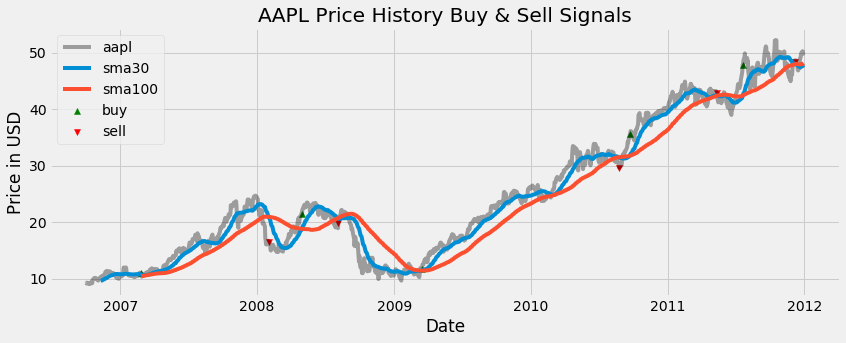

In [17]:
plt.figure(figsize=(12.6,4.6))
plt.plot(aapl['AAPL'],label = 'aapl',alpha = 0.35, color = 'black')
plt.plot(aapl['30'],label = 'sma30')
plt.plot(aapl['100'],label = 'sma100')
plt.scatter(aapl.index,aapl['BuyPrice'], label = 'buy', marker = '^', color = 'green')
plt.scatter(aapl.index,aapl['SellPrice'], label = 'sell', marker = 'v', color = 'red')
plt.title('AAPL Price History Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')

plt.savefig('AAPL_buy_sell')
plt.show()